In [1]:
import pickle
import numpy as np
import pandas as pd
data_dir = "../Data/OBD_Data_only/"

obddata = pd.DataFrame({})

num_trips = 20
df = pd.read_csv("1.csv", index_col=0)
obddata = df[df['tripID']<num_trips]

<IPython.core.display.Javascript object>


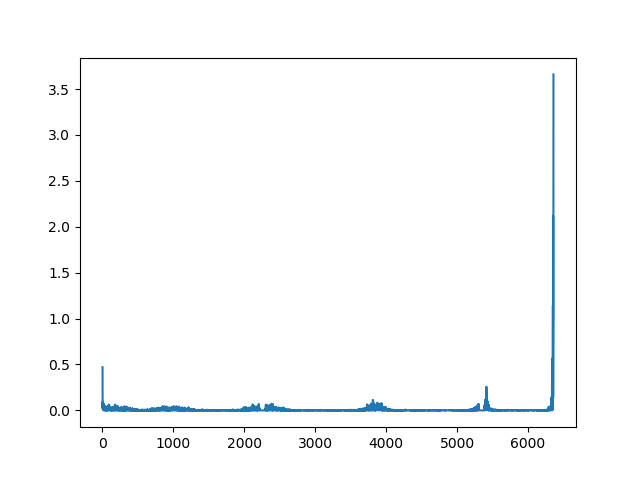

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt

df_ratio = pd.DataFrame
df_ratio = obddata['speed'] / obddata['rpm']
df_ratio = df_ratio.fillna(0)
df_ratio = df_ratio[df_ratio != 0]
df_ratio = df_ratio * 1000
df_ratio.replace(np.inf, np.nan).fillna(0)

sorted_data = df_ratio.sort_values().reset_index(drop=True)
plt.plot(sorted_data.diff())
# plt.plot(sorted_data)

In [3]:
import jenkspy
"""
    @Function that internally applies jenks on the number of classes specified as classes and calculate the 
    gvf parameter which is used for getting the optimal value of the num of classes
"""
import numpy as np
def goodness_of_variance_fit(array, classes):
    # get the break points
    classes = jenkspy.jenks_breaks(array, classes)

    # do the actual classification
    classified = np.array([classify(i, classes) for i in array])

    # max value of zones
    maxz = max(classified)

    # nested list of zone indices
    zone_indices = [[idx for idx, val in enumerate(classified) if zone + 1 == val] for zone in range(maxz)]

    # sum of squared deviations from array mean
    sdam = np.sum((array - array.mean()) ** 2)

    # sorted polygon stats
    array_sort = [np.array([array[index] for index in zone]) for zone in zone_indices]

    # sum of squared deviations of class means
    sdcm = sum([np.sum((classified - classified.mean()) ** 2) for classified in array_sort])

    # goodness of variance fit
    gvf = (sdam - sdcm) / sdam

    return gvf

def classify(value, breaks):
    for i in range(1, len(breaks)):
        if value < breaks[i]:
            return i
    return len(breaks) - 1

gvf = 0.0
nclasses = 2
while gvf < .95 and nclasses < 7:
    gvf = goodness_of_variance_fit(sorted_data, nclasses)
    print(gvf)
    nclasses += 1
    
print(nclasses)

ModuleNotFoundError: No module named 'jenkspy'

In [ ]:
import jenkspy
"""
Save the jenks breaks for a particular no of trips in a file to see the variations in the borders detected
"""
breaks = jenkspy.jenks_breaks(sorted_data, nclasses-1)

with open("Results_jenks/values_for_classes", "a") as f:
    f.write("For Number of trips = "+str(no_trips)+"\n")
    f.write("\t".join(map(str,breaks)))
    f.write("\n")
print(breaks)

In [ ]:
# Display the breaks as lines parallel to the x axis on the graph
%matplotlib notebook

import matplotlib.pyplot as plt

plt.plot(sorted_data)

for br in breaks:
    plt.axhline(y = br, color = 'black')

plt.show()